# 常规赛：PALM眼底彩照视盘探测与分割基线方案

**赛题简述**
	
    PALM眼底视盘检测与分割常规赛的重点是研究和发展与患者眼底照片结构分割相关的算法。该常规赛的目标是评估和比较在一个常见的视网膜眼底图像数据集上分割视盘的自动算法。该任务目的是对眼底图像的视盘进行检测，若存在视盘结构，需从眼底图像中分割出视盘区域；若无视盘结构，分割结果直接置全背景。

![](https://ai-studio-static-online.cdn.bcebos.com/938ab4fac88e44969e61f8f10181ca1366c53fbc3d6147ff80487b03c964543e)


**数据基本标签**

	标签为 0 代表视盘（黑色区域）；标签为 255 代表其他（白色区域）。
    

**训练数据集**

文件名称：Train

Train文件夹里有fundus_images文件夹和Disc_Masks文件夹。

* fundus_images文件夹内包含800张眼底彩照，分辨率为1444×1444，或2124×2056。命名形如H0001.jpg、N0001.jpg、P0001.jpg和V0001.jpg。

* Disc_Masks文件夹内包含fundus_images里眼底彩照的视盘分割金标准，大小与对应的眼底彩照一致。命名前缀和对应的fundus_images文件夹里的图像命名一致，后缀为bmp。

**测试数据集**

文件名称：PALM-Testing400-Images

* 包含400张眼底彩照，命名形如T0001.jpg。

由于是第一次参加飞桨比赛，时间较紧，没有经验，视乎不确定checkpoint是否被保存

# 基线改动
这里我主要是在基线模型EMANet的基础上，替换为DEEPLabV3，backbone为resnet50的预训练模型，最终结果达到94%。在训练中通过配置yml文件来进行训练和预测。



# 一、基线方案内容

* 解压数据与数据划分

	-- # 解压数据集
    
	-- !unzip -oq /home/aistudio/data/data85136/常规赛：PALM眼底彩照视盘探测与分割.zip -d PaddleSeg/data
    
   -- # 划分数据
   
	-- !python utils/dataset_splited.py

* 数据标签预处理

   -- # 转换标签
   
   -- !python utils/dataset_pretrans.py

	* 原分类为1分类问题，为了问题研究的充分性和更大程度上利用多分类间的类别竞争对分类结构有一个更好的指导
   
   * 二分类问题描述，原标签为0不变，将255无效值转换为1值
   
   * 后期提交前会后处理，消去1值，换回赛题需要的255值
   
* 利用PaddleSeg套件加速赛题开发与测试: 可参考套件config中的yml，结合动态图API进行快速高效的实验开发

* 实现训练流程

* 实现预测流程

* 完成提交结果 -- 基线方案为0.92431的得分(iters:2400)，可从**训练迭代次数**、**损失函数**、**模型**入手
	
   -- # 提交结果后处理
   
	-- utils/post_process.py

**部分训练参数**

![](https://ai-studio-static-online.cdn.bcebos.com/19c1febc87ec4fd78bb5b4a1966389c0979588525df44379885e5543c41d363c)

![](https://ai-studio-static-online.cdn.bcebos.com/d8ff821a46ab43df8e13fda1d2e5752bd4a54eeb3ae643dbad0288ff41f0c6cd)


In [ ]:
# 解压PaddleSeg压缩包
!unzip -oq data/data88946/PaddleSeg.zip -d /home/aistudio/
# 修改文件名
!mv PaddleSeg-release-v2.0 PaddleSeg

上一步mv，可以将PaddleSeg加压后的文件目录改成PaddleSeg

> PaddleSeg下载至github的release2.0版本，为了方便大家使用，已添加在了数据集中供大家使用

In [ ]:
!rm -r data/Test/

In [ ]:
# 解压数据集到PaddleSeg目录下的data文件夹
!unzip -oq data/data110621/常规赛：PALM眼底彩照视盘探测与分割.zip -d PaddleSeg/data

unzip:  cannot find or open data/data110621/常规赛：PALM眼底彩照视盘探测与分割.zip, data/data110621/常规赛：PALM眼底彩照视盘探测与分割.zip.zip or data/data110621/常规赛：PALM眼底彩照视盘探测与分割.zip.ZIP.


In [ ]:
# 查看数据集文件的树形结构
!tree -d PaddleSeg/data/Test

PaddleSeg/data/Test [error opening dir]

0 directories


# 二、比赛数据集情况
PALM-Testing400-Images : 测试数据集文件夹

Train : 训练数据集文件夹

* Disc_Masks   ; 标注图片
* fundus_image  : 原始图片

> 注意没有验证数据集，这里提供一个简单的划分程序，划分比例为0.7

通过PIL的Image读取图片查看以下原数据与Label标注情况

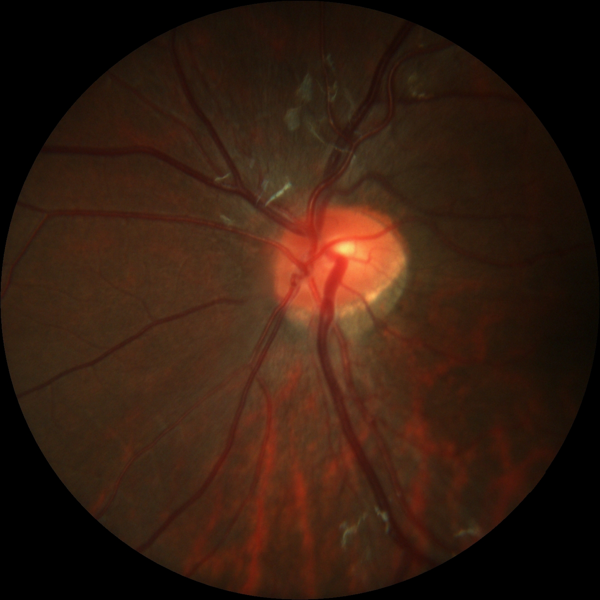

In [ ]:
from PIL import Image

# 读取图片
png_img = Image.open('PaddleSeg/data/常规赛：PALM眼底彩照视盘探测与分割/Train/fundus_image/H0003.jpg')
png_img = png_img.resize((600, 600))
png_img  # 展示图片

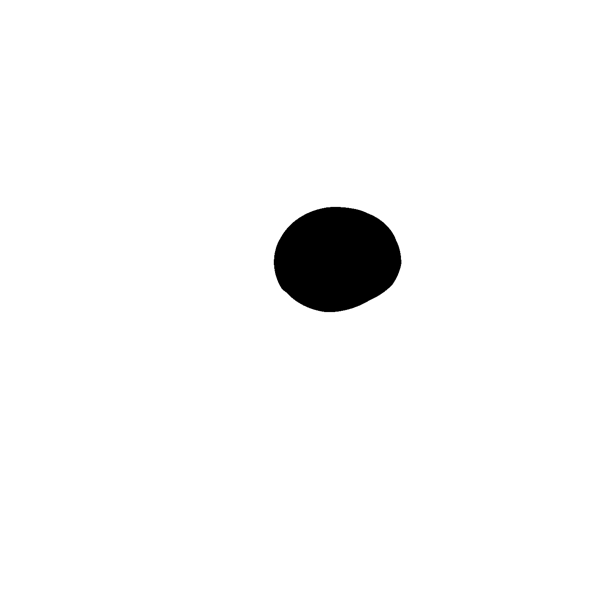

In [ ]:
bmp_img = Image.open('PaddleSeg/data/常规赛：PALM眼底彩照视盘探测与分割/Train/Disc_Masks/H0003.bmp')
bmp_img = bmp_img.resize((600, 600))
bmp_img   # 展示图片

可以看出，白色部分全是255，黑色为有效标注区域(0值)

# 三、划分数据集与数据预处置


当前划分比例为0.7——可在`utils`文件夹下的`dataset_splited.py`修改`train_percent`为其它值

数据预处置-可在`utils`文件夹下的`dataset_pretrans.py`中查看相关代码

In [ ]:
# 保证路径为初始路径
%cd /home/aistudio

# 划分数据
!python utils/dataset_splited.py

# 转换标签--预处置
!python utils/dataset_pretrans.py

/home/aistudio
————开始数据清洗划分————
The Split Params: train_percent=0.70
Image Dir Has Ready!
Label Dir Has Ready!
Processing Test Split: 100%|█████████████████| 400/400 [00:00<00:00, 653.79it/s]
完成数据集划分：
- 数据根目录: PaddleSeg/data
	 - 子目录: Image: 存放真实图片
		 - to_train: 训练用 , lens:560
		 - to_val: 验证用 , lens:240
		 - to_test: 测试用(提交预测) , lens:400
	 - 子目录: Label: 存放标注图片
		 - to_train: 训练用 , lens:560
		 - to_val: 验证用 , lens:240
		 - to_test: 测试用(保存提交预测) , lens:0
————开始数据预处理转换————
转换说明:
	 1. 默认标签为255与0，为了训练方便，将255转换为1，变成2分类问题
	 2. 新标签0与1，预测结束进行后处理即可得到赛题需要的结果
100%|█████████████████████████████████████████| 800/800 [00:21<00:00, 37.68it/s]


移除原数据，减小项目空间，减少下一次进入和退出保存时花的时间

In [ ]:
# 移除’常规赛：PALM眼底彩照视盘探测与分割‘文件夹
!rm -rf PaddleSeg/data/常规赛：PALM眼底彩照视盘探测与分割
!rm -rf PaddleSeg/data/__MACOSX

# 四、下载依赖项

> 平台可以不用下载，但是如果在本地可能需要执行这一步

In [1]:
# 下载依赖项，保证PaddleSeg正常运行
%cd PaddleSeg
%pwd
!pip install -r requirements.txt

/home/aistudio/PaddleSeg
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


# 五、开始构建比赛模型

## 1.导入需要的库

In [ ]:
pwd

'/home/aistudio/PaddleSeg'

PaddleSeg/train.py

## 2.创建模型与Dataset

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
# 损失函数
class DiceLoss(nn.Layer):
    """
    Implements the dice loss function.
    Args:
        ignore_index (int64): Specifies a target value that is ignored
            and does not contribute to the input gradient. Default ``255``.
    """

    def __init__(self, ignore_index=2):
        super(DiceLoss, self).__init__()
        self.ignore_index = ignore_index
        self.eps = 1e-5

    def forward(self, logits, labels):
        if len(labels.shape) != len(logits.shape):
            labels = paddle.unsqueeze(labels, 1)
        num_classes = logits.shape[1]
        mask = (labels != self.ignore_index)
        logits = logits * mask
        labels = paddle.cast(labels, dtype='int32')
        single_label_lists = []
        for c in range(num_classes):
            single_label = paddle.cast((labels == c), dtype='int32')
            single_label = paddle.squeeze(single_label, axis=1)
            single_label_lists.append(single_label)
        labels_one_hot = paddle.stack(tuple(single_label_lists), axis=1)
        logits = F.softmax(logits, axis=1)
        labels_one_hot = paddle.cast(labels_one_hot, dtype='float32')
        dims = (0,) + tuple(range(2, labels.ndimension()))
        intersection = paddle.sum(logits * labels_one_hot, dims)
        cardinality = paddle.sum(logits + labels_one_hot, dims)
        dice_loss = (2. * intersection / (cardinality + self.eps)).mean()
        return dice_loss

### EMANet完整参数介绍如下：

`source: PaddleSeg/paddleseg/models/emanet.py`

```python
num_classes,
backbone,
backbone_indices=(2, 3),       
ema_channels=512,            # ema输入通道——backbone输出-->经过ema输入得到ema_channels的通道数
gc_channels=256,             # ema输出编码通道(不等于num_classes)
num_bases=64,               # 注意力参数个数
stage_num=3,                # 编码状态(次数)
momentum=0.1,               # 动量--与注意力有关
concat_input=True,           # 拼接输入
enable_auxiliary_loss=True,     # 组合损失
align_corners=False,          # 居中对齐
pretrained=None              # 是否加载预处理
```

* DiceLoss比较符合赛题

* CrossEntropyLoss适合多分类损失计算

* 如果是相同的损失可以通过: [L.CrossEntropyLoss()] * 2 实现 [L.CrossEntropyLoss(), L.CrossEntropyLoss()]

* coef系数值，不是越大越好，控制适当的比例就可以了

## 4.开始训练

In [ ]:

!unzip /home/aistudio/data/data110621/常规赛：PALM眼底彩照视盘探测与分割.zip

In [ ]:
pwd

'/home/aistudio/PaddleSeg'

In [ ]:
!cp -r PaddleSeg/常规赛：PALM眼底彩照视盘探测与分割/PALM-Testing400-Images ./PaddleSeg/data/

cp: cannot stat 'PaddleSeg/常规赛：PALM眼底彩照视盘探测与分割/PALM-Testing400-Images': No such file or directory


使用了deeplabv3p为主框架，backbone设置为预训练模型resnet50，yaml文件如下：

In [ ]:
# 训练分割Atrophy的模型，并保存到/output/Atrophy
!python train.py --c configs/deeplabv3/deeplabv3p_resnet50_os8_voc12aug_512x512_40k_D.yml \
--use_vdl \
--batch_size 2 \  #由于GPU的限制，batch大小仅能设置为2.
--save_interval 200 \
--do_eval \
--seed 2021 \
--iters 3000 \
--learning_rate 0.01 \
--save_dir ./output/deeplabv3

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
2021-09-29 16:58:28 [INFO]	
------------Environment Information-------------
platform: Linux-4.4.0-150-generic-x86_64-with-debian-stretch-sid
Python: 3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
Paddle compiled with cuda: True
NVCC: Cuda compilation tools, release 10.1, V10.1.243
cudnn: 7.6
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: Tes

In [ ]:
pwd

'/home/aistudio'

In [ ]:
cd PaddleSeg/

/home/aistudio/PaddleSeg


In [ ]:
!python predict.py --config configs/deeplabv3/deeplabv3p_resnet50_os8_voc12aug_512x512_40k_D.yml \
--model_path output/deeplabv3/best_model/model.pdparams \
--image_path data/Test \
--save_dir ./output/result/

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
2021-09-29 19:49:35 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 40000
learning_rate:
  decay:
    end_lr: 0.0
    power: 0.9
    type: poly
  value: 0.01
loss:
  coef:
  - 1
  types:
  - type: CrossEntropyLoss
model:
  align_corners: false
  aspp_out_channels: 256
  aspp_ratios:
  - 1
  - 12
  - 24
  - 36
  backbone:
  

## 5.开始预测

预测的配置略微不同，需要读取`test_list.txt`中的文件进入list中，然后传入list以及Image_dir进行预测

> 前面的训练与验证是通过给dir，自动搜寻，这里不一样，要注意一下哦

使用`predict`接口进行预测

## 6.后处理并生成提交文件

In [10]:
cd PaddleSeg/output/results/

/home/aistudio/PaddleSeg/output/results


In [11]:
!cp -r pseudo_color_prediction/ Image/

In [12]:
%cd /home/aistudio
!python utils/post_process.py 

/home/aistudio
————开始提交结果前的后处理————
100%|█████████████████████████████████████████| 253/253 [00:15<00:00, 16.42it/s]
0it [00:00, ?it/s]
后处理完成(cost: 15.412912607192993 s)！


In [13]:
# 复制文件到最顶层目录
!cp -r PaddleSeg/output/results/pseudo_color_prediction/Image/ Disc_Segmentation
# 压缩文件
!zip -r Disc_Segmentation.zip Disc_Segmentation
# 删除复制的文件
!rm -rf Disc_Segmentation

  adding: Disc_Segmentation/ (stored 0%)
  adding: Disc_Segmentation/T0226.png (deflated 82%)
  adding: Disc_Segmentation/T0002.png (deflated 82%)
  adding: Disc_Segmentation/T0379.png (deflated 88%)
  adding: Disc_Segmentation/T0178.png (deflated 79%)
  adding: Disc_Segmentation/T0202.png (deflated 83%)
  adding: Disc_Segmentation/T0100.png (deflated 75%)
  adding: Disc_Segmentation/T0180.png (deflated 72%)
  adding: Disc_Segmentation/T0127.png (deflated 87%)
  adding: Disc_Segmentation/T0392.png (deflated 72%)
  adding: Disc_Segmentation/T0282.png (deflated 82%)
  adding: Disc_Segmentation/T0032.png (deflated 83%)
  adding: Disc_Segmentation/T0001.png (deflated 76%)
  adding: Disc_Segmentation/T0345.png (deflated 80%)
  adding: Disc_Segmentation/T0139.png (deflated 97%)
  adding: Disc_Segmentation/T0074.png (deflated 76%)
  adding: Disc_Segmentation/T0303.png (deflated 84%)
  adding: Disc_Segmentation/T0400.png (deflated 70%)
  adding: Disc_Segmentation/T0323.png (deflated 83%)
  add

其它一些清理步骤选择性使用即可

In [ ]:
!rm Disc_Segmentation.zip

In [ ]:
!rm -rf PaddleSeg/output/best_model/

In [ ]:
!rm -rf PaddleSeg/output/iter_1600/
!rm -rf PaddleSeg/output/iter_1800/
!rm -rf PaddleSeg/output/iter_2000/
!rm -rf PaddleSeg/output/iter_2200/
!rm -rf PaddleSeg/output/iter_2400/

In [ ]:
!rm -rf PaddleSeg/output

In [ ]:
# 删除zip的文件--丢失提交结果，需重新后处理生成
# !rm -rf Disc_Segmentation.zip
# 删除预测结果--丢失预测结果，需重新预测
# !rm -rf PaddleSeg/output/results
# 删除output文件夹--丢失模型参数，需重新训练
# !rm -rf PaddleSeg/output
# 删除data文件夹--数据将丢失，需要重新解压，划分，预处置
# !rm -rf PaddleSeg/data

# 六、其它建议

- 1. 模型建议：注意力模型或者经典的unet模型

- 2. 损失建议：多损失结构，不同的ccoef，针对赛题的特殊损失等

- 3. 模型魔改建议：尝试对Unet添加注意力模块，修改参数，或者调整不同的backbone与indices组合

- 4. 优化器与学习率策略的调整


最后，祝大家Paddle越用越顺手，比赛越打越顺利——取得理想的成绩！
> 有问题欢迎评论区讨论


> 姓名：蔡敬辉

> 学历：大三（在读）

> 爱好：喜欢参加一些大大小小的比赛，不限于计算机视觉——有共同爱好的小伙伴可以关注一下哦~后期会持续更新一些自制的竞赛baseline和一些竞赛经验分享

> 主要方向：目标检测、图像分割与图像识别--在学习NLP, 正在捣鼓FPGA

> 联系方式：qq:3020889729 微信:cjh3020889729

> 学校：西南科技大学